In [196]:
import numpy as np
import pandas as pd
import datetime as dt

In [197]:
from matplotlib import style
style.use('ggplot')
plt.xkcd()
import matplotlib.pyplot as plt

In [203]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [204]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [205]:
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurement', 'station']

In [206]:
Measurement = Base.classes.measurement
Station = Base.classes.station

In [207]:
session = Session(engine)


In [208]:
# Calculate the date 1 year ago from the last data point in the database
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
Date_One_Year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(Date_One_Year_ago)

2016-08-23


In [210]:
 # Design a query to retrieve the last 12 months of precipitation data and plot the results
precipitations = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date.between("2016-08-23","2017-08-23")).\
    order_by(Measurement.date).all()

In [211]:
precipitations_df = pd.DataFrame(precipitations)
precipitations_df.head()


,date,prcp
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02


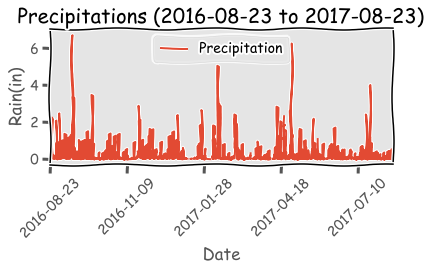

In [212]:
precipitations_df.plot("date","prcp")
plt.xlabel("Date")
plt.ylabel("Rain(in)")
plt.title("Precipitations (2016-08-23 to 2017-08-23)")
plt.legend(["Precipitation"])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [213]:
precipitations_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [214]:
# Design a query to show how many stations are available in this dataset?
locations = session.query(Measurement).group_by(Measurement.station).count()
print("There are {} stations!".format(locations))

There are 9 stations!


In [215]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
busy_station = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).\
               order_by(func.count(Measurement.tobs).desc()).all()

busiest = busy_station[0][0]    
print("The busiest Station is", busiest,"with",busy_station[0][1],"observations")
print()
for station, count in busy_station:
    print(station,",",count)

The busiest Station is USC00519281 with 2772 observations

USC00519281 , 2772
USC00519397 , 2724
USC00513117 , 2709
USC00519523 , 2669
USC00516128 , 2612
USC00514830 , 2202
USC00511918 , 1979
USC00517948 , 1372
USC00518838 , 511


In [217]:
#Design a query to retrieve the last 12 months of temperature observation data (tobs)
temperature = session.query(Measurement.station, Measurement.date, Measurement.tobs).\
    filter(Measurement.station == busiest).\
    filter(Measurement.date > last_year).\
    order_by(Measurement.date).all()

datetime.date(2016, 8, 23)

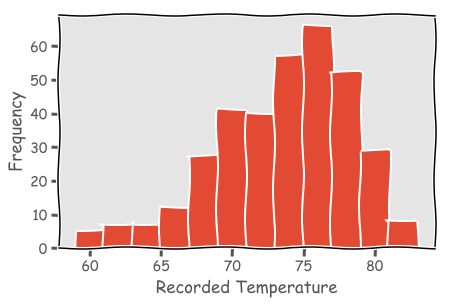

In [218]:
temp_df=pd.DataFrame(temperature)
plt.hist(temp_df['tobs'],12)
plt.xlabel("Recorded Temperature")
plt.ylabel("Frequency")
#plt.title("Station Analysis (8/23/16 to 8/23/17) for Station " + busiest)
plt.show()